<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/Embedding%2BLSTMmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
import pandas as pd

# Load the dataset from the xlsx file
df = pd.read_excel('Final_dataset.xlsx')

# Show a sample of the data to check the structure
print(df.head())


                                         review_text  PM Ratio  FPSP Ratio  \
0  a bad experience I will never go to that place...  0.007968    0.045455   
1  a bad experience in this place I will not retu...  0.030928    0.181818   
2  A bastion of the old school diner Cheap sandwi...  0.051282    0.000000   
3  A beautiful cafe in Brooklyn with many options...  0.016393    0.000000   
4  A beautiful place to spend your time at The ca...  0.030769    0.000000   

   Review Length  RW Ratio  Sentiment  Generalization  Passive Voice  \
0             46       0.2    -0.9607        0.722222            0.0   
1             18       0.0    -0.2500        1.055556            0.0   
2             31       0.0     0.7269        1.064516            0.0   
3             10       0.0     0.5994        0.500000            0.0   
4             13       0.0     0.8074        1.000000            0.0   

   Total reviewer reviews  Account type  Useful votes   Attached Medias  Label  
0                

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_column = df.iloc[:, 0]

# Vectorizing the text column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
text_features = tfidf_vectorizer.fit_transform(text_column).toarray()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract numerical and boolean features (assumed to be from column 2 to 9)
numerical_columns = df.iloc[:, 1:11]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_columns)


In [ ]:
# Assuming the last column is the label column
labels = df.iloc[:, -1]


In [ ]:
import numpy as np

# Combine TF-IDF text features and scaled numerical features
final_features = np.hstack([text_features, scaled_numerical_features])


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter  # Import Counter to count class distribution

X_train, X_test, y_train, y_test = train_test_split(final_features, labels, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE:", sorted(Counter(y_train).items()))  # Class distribution before
print("After SMOTE:", sorted(Counter(y_train_smote).items()))  # Class distribution after


Before SMOTE: [(0, 10092), (1, 7088)]
After SMOTE: [(0, 10092), (1, 10092)]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7933 - loss: 1.0851 - val_accuracy: 0.8466 - val_loss: 0.4149
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8534 - loss: 0.4141 - val_accuracy: 0.8490 - val_loss: 0.4130
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.4012 - val_accuracy: 0.8629 - val_loss: 0.3996
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8649 - loss: 0.3952 - val_accuracy: 0.8612 - val_loss: 0.4049
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.3984 - val_accuracy: 0.8661 - val_loss: 0.3995
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.4004 - val_accuracy: 0.8734 - val_loss: 0.3935
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.4035 - val_accuracy: 0.8719 - val_loss: 0.3872
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.3978 - val_accuracy: 0.

In [ ]:
# Evaluate the model on the test data 2
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_acc}')


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.4073
Test accuracy: 0.8703445196151733


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_acc}')

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8978 - loss: 0.3518
Test accuracy: 0.8947858214378357


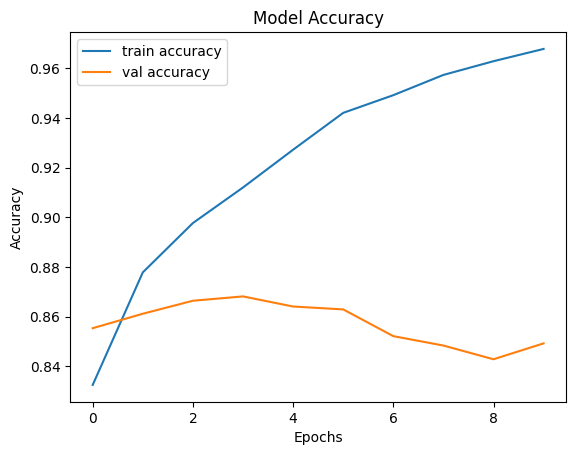

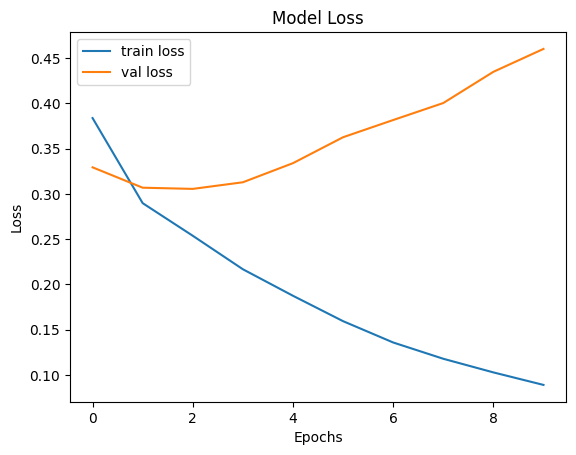

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


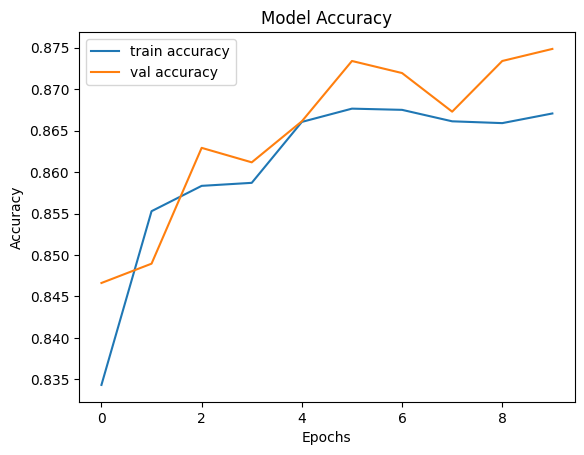

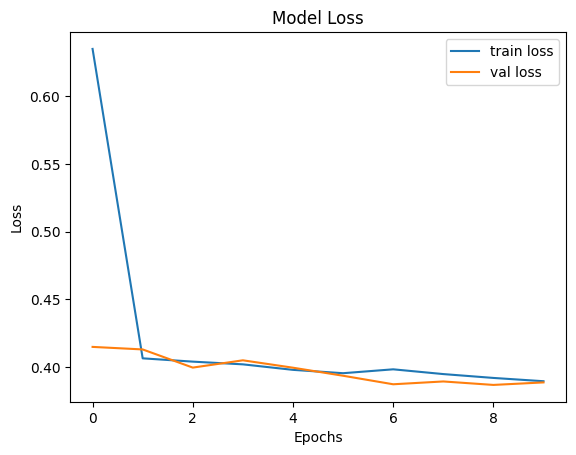

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **BERT model**

In [ ]:
pip install transformers datasets torch scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Separate the text and other features
X_text = df.iloc[:, 0]  # Assuming the first column contains text
y = df.iloc[:, -1]  # Assuming the last column is the label

# Split the dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [ ]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(list(X_train_text), truncation=True, padding=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(list(X_test_text), truncation=True, padding=True, max_length=512, return_tensors='pt')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch
from torch.utils.data import Dataset

class FakeReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects for train and test
train_dataset = FakeReviewDataset(train_encodings, y_train)
test_dataset = FakeReviewDataset(test_encodings, y_test)


In [ ]:
from transformers import BertForSequenceClassification

# Load the pre-trained BERT model for binary classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.583600,0.571343
2,0.516600,0.595255
3,0.408900,0.649231


<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct fro

TrainOutput(global_step=3222, training_loss=0.506910303969475, metrics={'train_runtime': 5127.8457, 'train_samples_per_second': 10.051, 'train_steps_per_second': 0.628, 'total_flos': 1.35607437932544e+16, 'train_loss': 0.506910303969475, 'epoch': 3.0})

In [ ]:
# Evaluate the model
trainer.evaluate()

# Optionally, make predictions on test data
predictions = trainer.predict(test_dataset)


<ipython-input-38-c1a92db841af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
from sklearn.metrics import classification_report

y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=1)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2491
           1       0.65      0.63      0.64      1805

    accuracy                           0.70      4296
   macro avg       0.69      0.69      0.69      4296
weighted avg       0.70      0.70      0.70      4296



### **BERT Using Text and Label only ( without other features)**

In [ ]:
pip install transformers torch scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Load your dataset
df = pd.read_excel('Final_dataset.xlsx')

# Extract text and labels (assuming the first column is text and the last is label)
X_text = df.iloc[:, 0]  # First column for text
y = df.iloc[:, -1]  # Last column for labels

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(list(X_train_text), truncation=True, padding=True, max_length=512, return_tensors='pt')
test_encodings = tokenizer(list(X_test_text), truncation=True, padding=True, max_length=512, return_tensors='pt')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects for train and test sets
train_dataset = TextDataset(train_encodings, y_train)
test_dataset = TextDataset(test_encodings, y_test)


In [ ]:
from transformers import BertForSequenceClassification

# Load BERT for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.586200,0.579378
2,0.523900,0.593310
3,0.419800,0.644798


<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct fro

TrainOutput(global_step=3222, training_loss=0.5152527887875955, metrics={'train_runtime': 5115.4281, 'train_samples_per_second': 10.075, 'train_steps_per_second': 0.63, 'total_flos': 1.35607437932544e+16, 'train_loss': 0.5152527887875955, 'epoch': 3.0})

In [ ]:
# Evaluate on test data
trainer.evaluate()

# Make predictions
predictions = trainer.predict(test_dataset)


<ipython-input-45-30d0c564cda1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
from sklearn.metrics import classification_report

# Get predicted labels
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=1)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2491
           1       0.65      0.62      0.64      1805

    accuracy                           0.70      4296
   macro avg       0.69      0.69      0.69      4296
weighted avg       0.70      0.70      0.70      4296



In [ ]:
pip install tensorflow keras

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_excel('Final_dataset.xlsx')

# Preprocess text (tokenizing)
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['review_text'])
sequences = tokenizer.texts_to_sequences(df['review_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Extract numerical and boolean features (assumed to be from column 2 to 9)
numerical_columns = df.iloc[:, 1:11]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_columns)


# Assuming the last column is the label column
labels = df.iloc[:, -1]



# Train-test split
X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(
    padded_sequences, scaled_numerical_features, labels, test_size=0.2, random_state=42
)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# Oversample the minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(np.hstack([X_text_train, X_other_train]), y_train)

# Split resampled data back into text and other features
X_text_train_resampled = X_train_resampled[:, :X_text_train.shape[1]]
X_other_train_resampled = X_train_resampled[:, X_text_train.shape[1]:]

# Define the input layers
text_input = Input(shape=(MAX_SEQUENCE_LENGTH,), name='text_input')
other_input = Input(shape=(X_other_train.shape[1],), name='other_input')

# Text branch (Embedding + LSTM)
embedding = Embedding(MAX_VOCAB_SIZE, 128)(text_input)
lstm = LSTM(64)(embedding)

# Combine LSTM output and numerical input
combined = concatenate([lstm, other_input])

# Dense layers
x = Dense(64, activation='relu')(combined)
x = Dropout(0.5)(x)  # Adding dropout for regularization
x = Dense(32, activation='relu')(x)

# Output layer (binary classification)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=[text_input, other_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the resampled data
history = model.fit(
    [X_text_train_resampled, X_other_train_resampled],
    y_train_resampled,
    epochs=10,
    batch_size=64,
    validation_data=([X_text_test, X_other_test], y_test)
)


Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7669 - loss: 0.4821 - val_accuracy: 0.8696 - val_loss: 0.3009
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8736 - loss: 0.2988 - val_accuracy: 0.8694 - val_loss: 0.2996
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9136 - loss: 0.2203 - val_accuracy: 0.8601 - val_loss: 0.3409
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9425 - loss: 0.1556 - val_accuracy: 0.8561 - val_loss: 0.4211
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9605 - loss: 0.1096 - val_accuracy: 0.8485 - val_loss: 0.5392
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9660 - loss: 0.0907 - val_accuracy: 0.8487 - val_loss: 0.5962
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9742 - loss: 0.0699 - val_accuracy: 0.8405 - val_loss: 0.6670
Epoch 8/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9797 - loss: 0.0586 - val_accuracy: 0.

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate([X_text_test, X_other_test], y_test)
print(f"Test Accuracy: {accuracy}")

# You can also compute F1-Score, Precision, Recall
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = (model.predict([X_text_test, X_other_test]) > 0.5).astype("int32")
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1-Score: {f1}, Precision: {precision}, Recall: {recall}")


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8447 - loss: 0.8973
Test Accuracy: 0.8412476778030396
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1-Score: 0.8098159509202454, Precision: 0.815272318921954, Recall: 0.804432132963989


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import numpy as np

# Predict the labels for the test set
y_pred_probs = model.predict([X_text_test, X_other_test])  # Predict probabilities
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary predictions (0 or 1)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC: {roc_auc:.4f}")


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8412
Confusion Matrix:
[[2162  329]
 [ 353 1452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2491
           1       0.82      0.80      0.81      1805

    accuracy                           0.84      4296
   macro avg       0.84      0.84      0.84      4296
weighted avg       0.84      0.84      0.84      4296

AUC-ROC: 0.9070


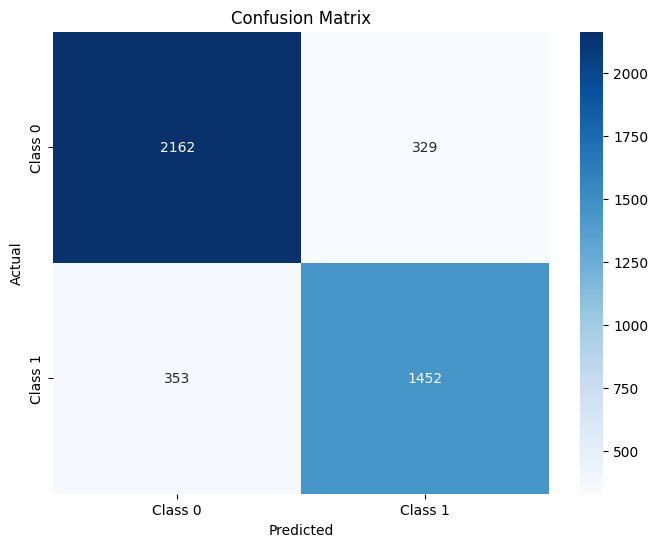

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
